# VISUALIZATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('dib.csv')
dib = df.iloc[0:5000].drop(['HvyAlcoholConsump', 'NoDocbcCost', 'DiffWalk', 'Education', 'Income'], axis=1).copy()
dib.shape

(5000, 17)

In [4]:
dib_count = dib['Diabetes_012'].value_counts().sort_index()
dib_count

Diabetes_012
0.0    3995
1.0      91
2.0     914
Name: count, dtype: int64

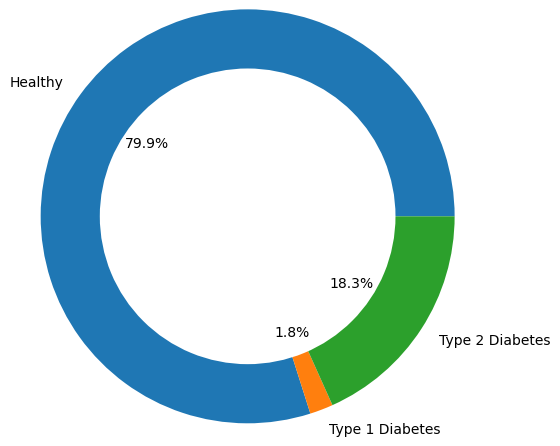

In [5]:
lb=["Healthy","Type 1 Diabetes","Type 2 Diabetes"]
plt.pie(dib_count, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")
plt.show()

In [6]:
bp_count = dib['HighBP'].value_counts().sort_index()
bp_count

HighBP
0.0    2464
1.0    2536
Name: count, dtype: int64

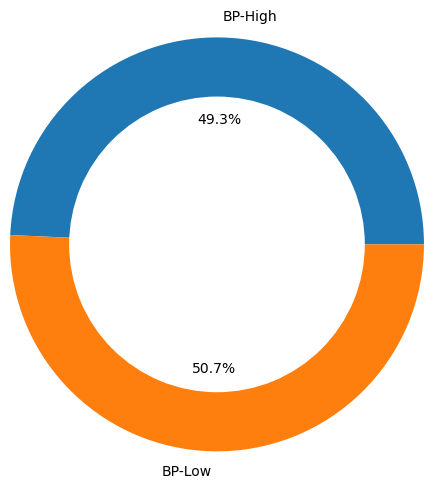

In [7]:
lb=["BP-High","BP-Low"]
plt.pie(bp_count, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")
plt.show()

In [8]:
chol_count = dib['HighChol'].value_counts().sort_index()
chol_count

HighChol
0.0    2671
1.0    2329
Name: count, dtype: int64

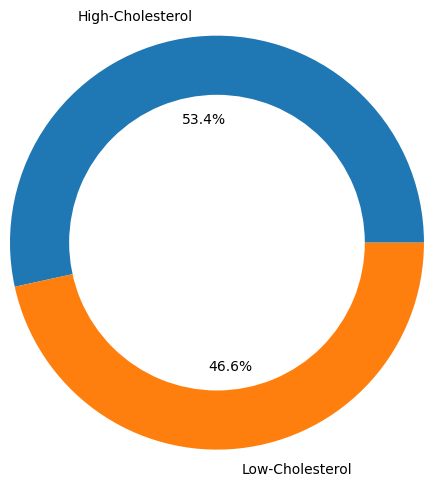

In [9]:
lb=["High-Cholesterol","Low-Cholesterol"]
plt.pie(chol_count, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")
plt.show()

In [10]:
smoke_count = dib['Smoker'].value_counts().sort_index()
smoke_count

Smoker
0.0    2760
1.0    2240
Name: count, dtype: int64

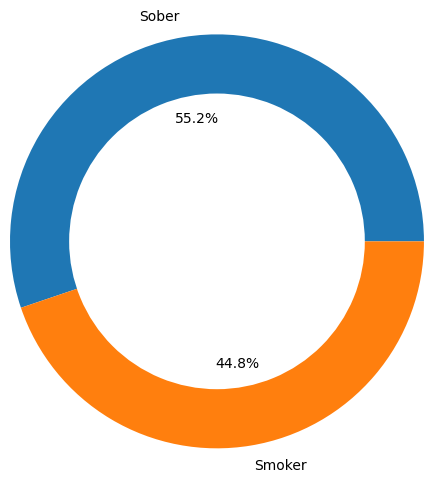

In [11]:
lb=["Sober","Smoker"]
plt.pie(smoke_count, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")
plt.show()

In [12]:
stroke_count = dib['Stroke'].value_counts().sort_index()
stroke_count

Stroke
0.0    4731
1.0     269
Name: count, dtype: int64

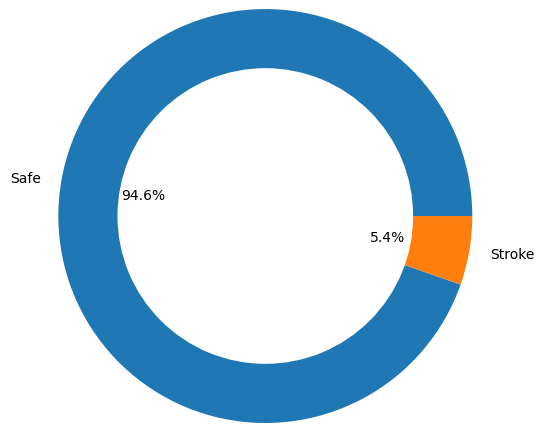

In [13]:
lb=["Safe","Stroke"]
plt.pie(stroke_count, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")
plt.show()

In [14]:
hda_count = dib['HeartDiseaseorAttack'].value_counts().sort_index()
hda_count

HeartDiseaseorAttack
0.0    4474
1.0     526
Name: count, dtype: int64

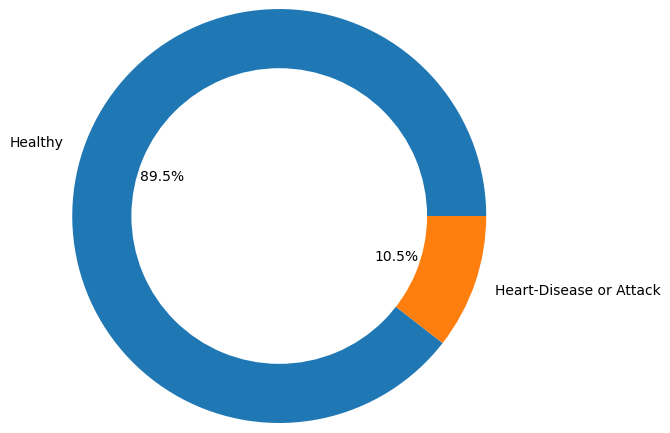

In [15]:
lb=["Healthy","Heart-Disease or Attack"]
plt.pie(hda_count, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")
plt.show()

In [16]:
pyact_count = dib['PhysActivity'].value_counts().sort_index()
pyact_count

PhysActivity
0.0    1504
1.0    3496
Name: count, dtype: int64

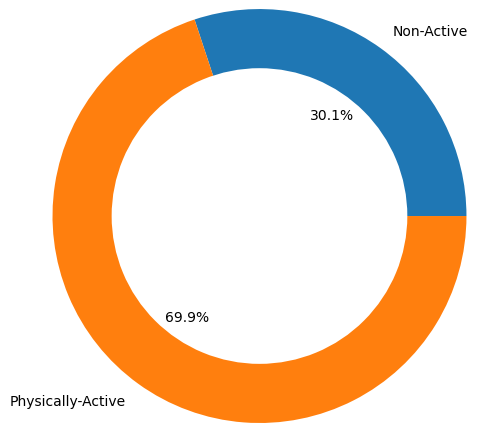

In [17]:
lb=["Non-Active", "Physically-Active"]
plt.pie(pyact_count, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")
plt.show()

In [18]:
fruits_count = dib['Fruits'].value_counts().sort_index()
fruits_count

Fruits
0.0    2223
1.0    2777
Name: count, dtype: int64

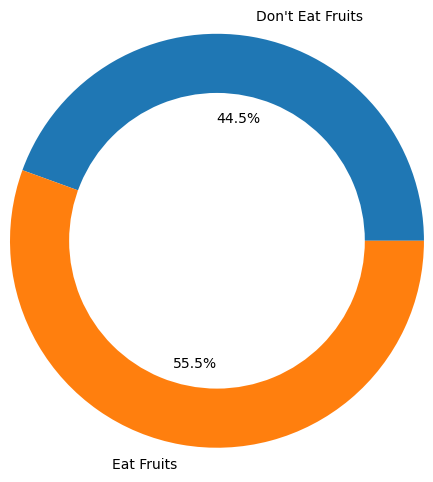

In [19]:
lb=["Don't Eat Fruits","Eat Fruits"]
plt.pie(fruits_count, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")
plt.show()

In [20]:
veg_count = dib['Veggies'].value_counts().sort_index()
veg_count

Veggies
0.0    1129
1.0    3871
Name: count, dtype: int64

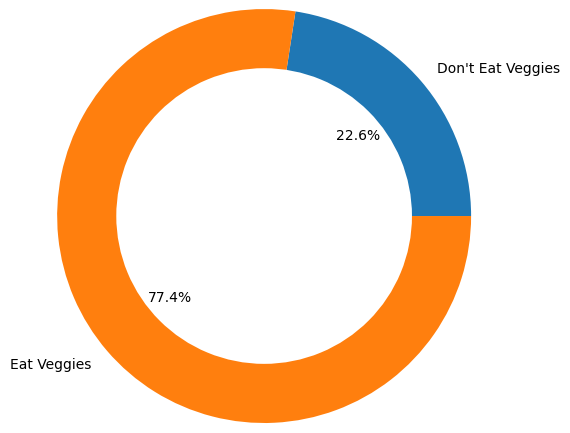

In [21]:
lb=["Don't Eat Veggies","Eat Veggies"]
plt.pie(veg_count, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")
plt.show()

In [22]:
healthcare_count = dib['AnyHealthcare'].value_counts().sort_index()
healthcare_count

AnyHealthcare
0.0     326
1.0    4674
Name: count, dtype: int64

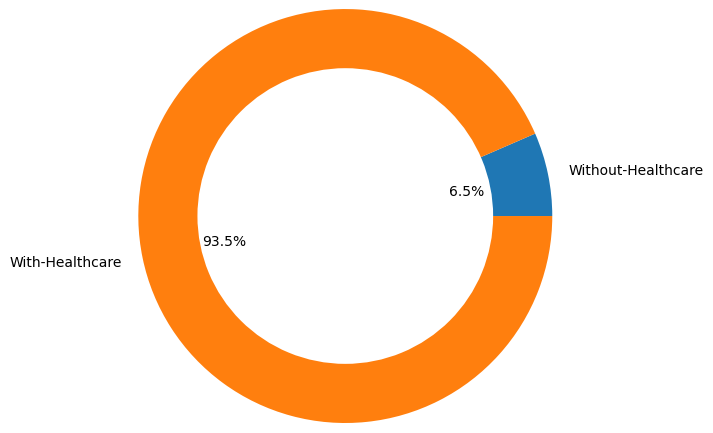

In [23]:
lb=["Without-Healthcare","With-Healthcare"]
plt.pie(healthcare_count, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")
plt.show()

In [24]:
health_count = dib['GenHlth'].value_counts().sort_index()
health_count

GenHlth
1.0     757
2.0    1473
3.0    1622
4.0     759
5.0     389
Name: count, dtype: int64

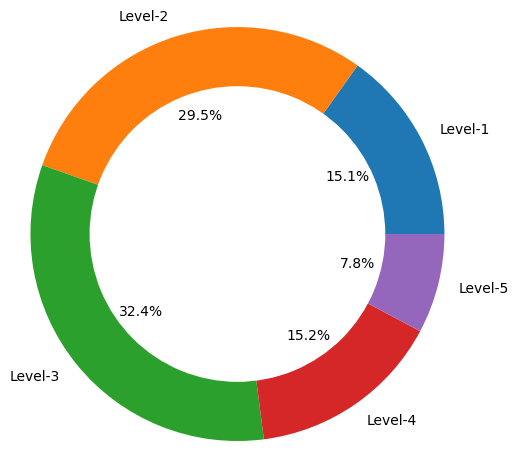

In [25]:
lb=["Level-1","Level-2","Level-3","Level-4", "Level-5"]
plt.pie(health_count, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")
plt.show()

In [26]:
age_count = dib['Age'].value_counts().sort_index()
age_count

Age
1.0     115
2.0     150
3.0     216
4.0     291
5.0     328
6.0     398
7.0     584
8.0     641
9.0     660
10.0    621
11.0    458
12.0    295
13.0    243
Name: count, dtype: int64

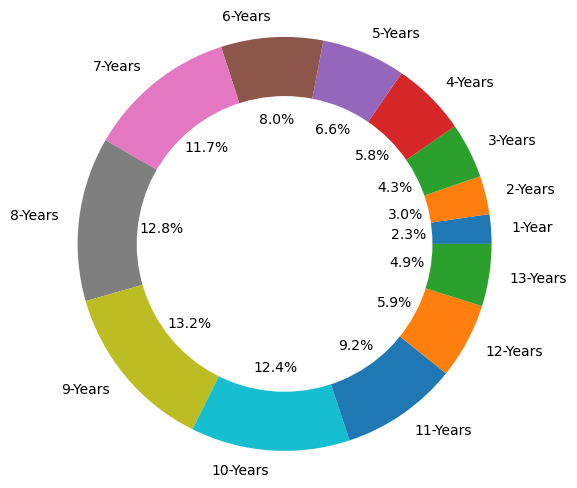

In [27]:
lb=["1-Year", "2-Years", "3-Years", "4-Years", "5-Years", "6-Years", "7-Years", "8-Years", "9-Years", "10-Years", "11-Years", "12-Years", "13-Years"]
plt.pie(age_count, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")
plt.show()

# MACHINE LEARNING

## Splitting the dataset into the Training set and Test set

In [28]:
X = dib.iloc[:, 1:].values
y = dib.iloc[:, 0].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
print(X_train)

[[ 1.  1.  1. ...  0.  0. 10.]
 [ 0.  1.  1. ...  0.  1.  6.]
 [ 0.  1.  1. ...  0.  0.  7.]
 ...
 [ 1.  0.  1. ...  0.  0.  9.]
 [ 1.  0.  1. ...  0.  0.  4.]
 [ 1.  1.  1. ...  0.  0.  6.]]


In [31]:
print(y_train)

[0. 0. 0. ... 0. 0. 2.]


In [32]:
print(X_test)

[[ 1.  0.  1. ...  0.  0. 10.]
 [ 1.  0.  1. ...  0.  1. 10.]
 [ 1.  0.  1. ...  0.  1. 11.]
 ...
 [ 1.  0.  1. ... 25.  1.  8.]
 [ 0.  1.  1. ...  0.  1.  9.]
 [ 0.  1.  1. ...  0.  0.  4.]]


In [33]:
print(y_test)

[0. 0. 0. 1. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0.
 0. 1. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 2. 0.
 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 2. 0. 2. 0. 2. 0. 0. 2. 0. 0. 0. 0. 0.
 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2. 0. 0. 2. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 1. 2. 0. 0. 0. 0. 0. 0. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 2. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.
 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0. 1. 1. 0. 0. 0. 0.

## Feature Scaling

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
print(X_train)

[[ 0.98068647  1.06725697  0.1825506  ... -0.54080202 -0.84052641
   0.702282  ]
 [-1.01969389  1.06725697  0.1825506  ... -0.54080202  1.18973062
  -0.63939108]
 [-1.01969389  1.06725697  0.1825506  ... -0.54080202 -0.84052641
  -0.30397281]
 ...
 [ 0.98068647 -0.93698147  0.1825506  ... -0.54080202 -0.84052641
   0.36686373]
 [ 0.98068647 -0.93698147  0.1825506  ... -0.54080202 -0.84052641
  -1.31022762]
 [ 0.98068647  1.06725697  0.1825506  ... -0.54080202 -0.84052641
  -0.63939108]]


In [36]:
print(X_test)

[[ 0.98068647 -0.93698147  0.1825506  ... -0.54080202 -0.84052641
   0.702282  ]
 [ 0.98068647 -0.93698147  0.1825506  ... -0.54080202  1.18973062
   0.702282  ]
 [ 0.98068647 -0.93698147  0.1825506  ... -0.54080202  1.18973062
   1.03770028]
 ...
 [ 0.98068647 -0.93698147  0.1825506  ...  2.05995792  1.18973062
   0.03144546]
 [-1.01969389  1.06725697  0.1825506  ... -0.54080202  1.18973062
   0.36686373]
 [-1.01969389  1.06725697  0.1825506  ... -0.54080202 -0.84052641
  -1.31022762]]


# 1. Logistic Regression

## Training the Logistic Regression model on the Training set

In [37]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


## Making the Confusion Matrix

In [39]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[789   0  23]
 [ 17   0   2]
 [144   0  25]]


0.814

# 2. K-Nearest Neighbors (KNN)

## Training the K-NN model on the Training set

In [40]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [41]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


## Making the Confusion Matrix

In [42]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[749   0  63]
 [ 17   0   2]
 [138   0  31]]


0.78

# 3. Support Vector Machine (SVM)

## Training the SVM model on the Training set

In [43]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting the Test set results

In [44]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


## Making the Confusion Matrix

In [45]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[812   0   0]
 [ 19   0   0]
 [169   0   0]]


0.812

# 4. Naive Bayes

## Training the Naive Bayes model on the Training set

In [46]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [47]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [2. 0.]
 [2. 0.]
 [0. 0.]]


## Making the Confusion Matrix

In [48]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[654   1 157]
 [  8   1  10]
 [ 94   0  75]]


0.73

# 5. Decision Tree Classification

## Training the Decision Tree Classification model on the Training set

In [49]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results

In [50]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2. 0.]
 [2. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


## Making the Confusion Matrix

In [51]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[661  17 134]
 [ 12   1   6]
 [108   5  56]]


0.718

# 6. Random Forest Classification

## Training the Random Forest Classification model on the Training set

In [52]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the Test set results

In [53]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


## Making the Confusion Matrix

In [54]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[771   1  40]
 [ 18   0   1]
 [134   1  34]]


0.805